## 통계적 공정관리(제조공정)

- 비교를 하여 작업 방법, 측정 시스템(계측기) 등 비교

- 1) 통계적 공정관리 개념 : spc의 목표는 관심을 갖는 중요한 품질 특성치를 목표치 주위에서 산포를 최소화하는것
   - Statistical : 통계적 자료와 분석기법의 도움을 받아서
   - Process : 프로세스의 품질변동을 주는 원인과 프로세스의 능력상태를 파악하여
   - Control : 주어진 품질목표가 달성될 수 있도록 PDCA사이클을 적용하여 지속석인 프로세스 개선이 이루어지도록 관리하는 활동
     - SPC 는 생산의 불일치를 감지하기 위해 통계적 접근방식을 사용하는 공정 및 품질 모니터링 방법
     - 1.이상 요인 탐지 2. 근본원인 규명 3.수정 조치 실시 4.검증 및 모니터


 - 1-1)통계적 공정관리(SPC)의 구조:
   - **관리도**를 통한 공정관리 (이상 요인 탐지) ,
   - UCL,CL,LCL (USL,LSL)범위를 벗어나는 수치가 이상치(불량) ,**독립성 검정** Day04ipynb 참조

- 1-2)공정능력지수 : 공정능력의 정도를 정량적(수치)으로 평가하기 위해, 공정의 산포 (기본 6σ)를 규격(Spec)의 크기와 비교한것 , 공정이 안정화된 상태 측정(USL,LSL 이 벗어나는게 없다)
  - 고객의 요구사항(규격한계,Spec limit),과 프로세스 관리 범위(+3σ, -3σ, 관리도)의 정량적 비교
  - 공감능력지수 = VOC/VOP = USL-LSL/6σ
  - USL 공정 상한
  - LSL 공정 하한
  - T : 목표치


### 공정능력지수

- 단기 공정능력과 장기공정능력 : 공정능력지수를 계산하는 공식은 같음
  - 단기간 : 공정능력지수(Cp) , 공정에 외부의 영향이 없다고 생각되는 짧은 기간의 공정능력 판단시 사용
  - 장기간 : 공정성능지수(Pp) , 공정의 외부 영향이 충분히 긴 기간동안의 공정능력 판단시 사용
    - 항상 Cp>Pp 이다.
  - 군내의 변동만을 포함하는 표준편차를 사용하면 단기 공정능력(Cp,Cpk)
  - 군내와 군간의 변동을 모두 포함하는 표준편차가 사용되면 장기 공정능력(Pp,Ppk)
    - 데이터가 치우쳐있으면 k를 붙혀준다 Cpk,Ppk


### 관리도
- 이미 발생한 불량 감지보다는, 불량 발생 이전에 공정의 이상상태를 감지하는 것이 목적
- 총 산포는 우연원인에 의한 산포 , 이상원인에 의한 산포로 구성 , **총산포 = 우연원인 + 이상원인**
  - 구성요소 : UCL(관리 상한) ,CL(중심선) ,LCL(관리 하한)
    - Center Line에서 Control Limit까지의 거리를 표준편차 단위로 표현, 일반적으로 3을 사용함
    - 공정이 안정적이랴면 모집단의 99.73%가 관리한계 내에 분포

#### 한계선의 차이
- 관리한계
  - 이탈해도 불량은 아니지만,변동원인을 조사
  - 사고가 발생되기 전에 징조를 포착하여 사전에 사고를 예방함
- 규격한계
  - 이탈하면 불량으로 판단

### 6 시그마 프로젝트 수행을 위한 DMAIC 절차 
추진 단계     

1단계 D(Define)
추진  내용
- 고객의 정의
- CTQ의 선정
- 프로젝트의 선정
  
2단계 M(Measure)
 - CTQ(Y)에 대한 기준 설정
 - 측정시스템(Y)에 대한 유효성 검정
 - 프로세스의 해석 및 개선의 목표 설정

3단계 A(Analyze)

 - 변동의 원인의 나열
 - 중요 원인의 파악

4단계 I(Improve)

 - 최적 조건의 설정
 - 개선 계획의 수립 및 실행

5단계 C(Control)

 - 측정시스템(X)의 확인
 - 중요 원인의 관리능력의 확인
 - 프로세스 관리체계의 확립
 - 효과파악 및 확산 전개

In [6]:
import pandas as pd
# 제조 공정 데이터 
# 열연 데이터 Y 가 없음
# Y를 만들어야됨 운전 데이터 가지고
# Y가 이상 없냐 있냐 , 범주형이라서 회귀분석을 돌릴 필요가 없다.

# X를 가지고 Y를 찾는 것이다.
# Y를가지고 오전에 많이나올까 오후에 많이나올까 나눌수 있다.
# Y는 X를가지고 만들어서 Y를 0 , 1로 만들어서 X,Y간에 어떤게 영향이 많은 지 비교해보자

# Y를 가지고 튀는걸 보는거다  3시그마를 보던가 box 플롯을 보던가.
# 이상치를 구해서 X 변수로 카운팅을하면 이상치를 보고 0,1을 나누는 것이다.

# Y는 IQR을 넘어가면 1 안넘어가면 0작업을 나눠야한다.
#  X 계수가 9개라면 0~9개가 나오는데 여기서  파생변수를 만들어서 0과 1로 나누어서 기준선을 정해서 Y값을 정하는거다?

# Y의 산포를 적게 가져가는게 , 프로세스가 안정화 됐다라고 볼 수 있다.

df = pd.read_csv('machine.csv')
df.head()

,Process_Type,Datetime,Code_Num,Z1_Temp,Z1_OP1,ST,Tube_Furnace1_OP,Tube_Furnace2_OP,Tube_Furnace3_OP,Tube_Furnace4_OP,Tube_Furnace_CP,Tube_Furnace1_Temp,Tube_Furnace2_Temp,Tube_Furnace3_Temp,Tube_Furnace4_Temp
0,OP-A,2022-01-03 11:22,GroupA,NaN,75.6648,NaN,73.527404,59.989422,52.249481,72.134908,0.450497,NaN,868.759544,NaN,NaN
1,OP-A,2022-01-03 11:22,GroupA,NaN,75.6706,NaN,79.149174,62.027232,50.617109,71.245235,0.457370,878.116929,883.821264,890.740760,894.430606
2,OP-A,2022-01-03 11:22,GroupA,99.614201,75.6776,68.724636,78.946336,62.235532,52.218350,72.705558,0.454914,866.441979,882.850031,864.373065,893.530501
3,OP-A,2022-01-03 11:22,GroupA,99.376221,75.8656,69.161116,78.445719,61.608260,52.863552,73.975640,0.456540,876.350472,906.208463,891.107865,896.347636
4,OP-C,2022-01-03 11:22,GroupA,99.809053,73.6468,69.181098,76.673808,61.589311,52.297196,71.887865,0.460100,903.587678,867.215131,893.206883,871.594283


In [7]:
df.shape

(231123, 15)

In [8]:
df.isnull().sum()

Process_Type            0
Datetime                0
Code_Num                0
Z1_Temp                25
Z1_OP1                  0
ST                     25
Tube_Furnace1_OP      254
Tube_Furnace2_OP        0
Tube_Furnace3_OP        0
Tube_Furnace4_OP        0
Tube_Furnace_CP         0
Tube_Furnace1_Temp      5
Tube_Furnace2_Temp     10
Tube_Furnace3_Temp      9
Tube_Furnace4_Temp     15
dtype: int64

In [9]:
df.columns

Index(['Process_Type', 'Datetime', 'Code_Num', 'Z1_Temp', 'Z1_OP1', 'ST',
       'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
       'Tube_Furnace4_OP', 'Tube_Furnace_CP', 'Tube_Furnace1_Temp',
       'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp'],
      dtype='object')

In [10]:
df.describe()  # Tube_Furnace1_OP의 min이 유별나게 작아 보인다.

,Z1_Temp,Z1_OP1,ST,Tube_Furnace1_OP,Tube_Furnace2_OP,Tube_Furnace3_OP,Tube_Furnace4_OP,Tube_Furnace_CP,Tube_Furnace1_Temp,Tube_Furnace2_Temp,Tube_Furnace3_Temp,Tube_Furnace4_Temp
count,231098.000000,231123.000000,231098.000000,230869.000000,231123.000000,231123.000000,231123.000000,231123.000000,231118.000000,231113.000000,231114.000000,231108.000000
mean,100.509681,72.622572,69.092959,75.309558,47.572004,50.532954,70.247528,0.449687,884.538184,885.041544,885.025677,884.987706
std,0.427198,3.009119,1.078253,20.663091,4.413487,1.965125,2.281762,0.044180,14.605636,14.418405,14.439180,14.431341
min,98.370946,52.981600,64.991438,0.005366,35.201679,37.519408,56.748502,0.097992,848.284519,858.669661,858.665411,858.352659
25%,100.234014,71.319050,68.253179,68.880077,45.219167,49.419740,68.875604,0.451953,872.057405,872.561376,872.534710,872.527927
50%,100.506511,72.903600,69.084741,78.708391,46.734401,50.646872,70.269142,0.454912,884.527439,885.047402,885.057021,884.954480
75%,100.779431,74.405000,69.996097,87.697873,48.412866,51.799096,71.554405,0.457826,896.960869,897.537632,897.535983,897.440629
max,102.663995,84.591100,71.527025,100.999998,66.825322,59.490855,83.410766,0.916338,920.832651,911.358760,910.976126,911.762271


In [11]:
df.describe(include='object')

,Process_Type,Datetime,Code_Num
count,231123,231123,231123
unique,3,3996,7
top,OP-C,2022-01-15 19:49,GroupA
freq,182486,60,54178


In [12]:
df['Datetime_dt'] = pd.to_datetime(df['Datetime'])
df

,Process_Type,Datetime,Code_Num,Z1_Temp,Z1_OP1,ST,Tube_Furnace1_OP,Tube_Furnace2_OP,Tube_Furnace3_OP,Tube_Furnace4_OP,Tube_Furnace_CP,Tube_Furnace1_Temp,Tube_Furnace2_Temp,Tube_Furnace3_Temp,Tube_Furnace4_Temp,Datetime_dt
0,OP-A,2022-01-03 11:22,GroupA,NaN,75.6648,NaN,73.527404,59.989422,52.249481,72.134908,0.450497,NaN,868.759544,NaN,NaN,2022-01-03 11:22:00
1,OP-A,2022-01-03 11:22,GroupA,NaN,75.6706,NaN,79.149174,62.027232,50.617109,71.245235,0.457370,878.116929,883.821264,890.740760,894.430606,2022-01-03 11:22:00
2,OP-A,2022-01-03 11:22,GroupA,99.614201,75.6776,68.724636,78.946336,62.235532,52.218350,72.705558,0.454914,866.441979,882.850031,864.373065,893.530501,2022-01-03 11:22:00
3,OP-A,2022-01-03 11:22,GroupA,99.376221,75.8656,69.161116,78.445719,61.608260,52.863552,73.975640,0.456540,876.350472,906.208463,891.107865,896.347636,2022-01-03 11:22:00
4,OP-C,2022-01-03 11:22,GroupA,99.809053,73.6468,69.181098,76.673808,61.589311,52.297196,71.887865,0.460100,903.587678,867.215131,893.206883,871.594283,2022-01-03 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231118,OP-C,2022-01-15 19:49,GroupD,100.202264,73.5343,68.405244,84.369599,43.864803,52.731835,71.606995,0.453212,875.288592,895.764797,869.150410,892.129335,2022-01-15 19:49:00
231119,OP-C,2022-01-15 19:49,GroupD,100.219542,73.5343,68.526229,85.214740,43.807730,52.788213,71.634139,0.451906,881.480945,888.820207,876.529220,884.019949,2022-01-15 19:49:00
231120,OP-C,2022-01-15 19:49,GroupD,101.141937,73.4839,68.877919,86.438976,44.946023,53.315676,72.529658,0.455600,868.731699,863.224662,883.589334,899.204662,2022-01-15 19:49:00
231121,OP-C,2022-01-15 19:49,GroupD,100.397590,73.4839,69.092723,86.214394,43.979252,53.533784,71.268777,0.452067,861.692367,905.774959,860.538841,902.815192,2022-01-15 19:49:00


In [13]:
df.isnull().sum()

Process_Type            0
Datetime                0
Code_Num                0
Z1_Temp                25
Z1_OP1                  0
ST                     25
Tube_Furnace1_OP      254
Tube_Furnace2_OP        0
Tube_Furnace3_OP        0
Tube_Furnace4_OP        0
Tube_Furnace_CP         0
Tube_Furnace1_Temp      5
Tube_Furnace2_Temp     10
Tube_Furnace3_Temp      9
Tube_Furnace4_Temp     15
Datetime_dt             0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230839 entries, 2 to 231122
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Process_Type        230839 non-null  object        
 1   Datetime            230839 non-null  object        
 2   Code_Num            230839 non-null  object        
 3   Z1_Temp             230839 non-null  float64       
 4   Z1_OP1              230839 non-null  float64       
 5   ST                  230839 non-null  float64       
 6   Tube_Furnace1_OP    230839 non-null  float64       
 7   Tube_Furnace2_OP    230839 non-null  float64       
 8   Tube_Furnace3_OP    230839 non-null  float64       
 9   Tube_Furnace4_OP    230839 non-null  float64       
 10  Tube_Furnace_CP     230839 non-null  float64       
 11  Tube_Furnace1_Temp  230839 non-null  float64       
 12  Tube_Furnace2_Temp  230839 non-null  float64       
 13  Tube_Furnace3_Temp  230839 non-nul

In [16]:
df.isnull().sum()

Process_Type          0
Datetime              0
Code_Num              0
Z1_Temp               0
Z1_OP1                0
ST                    0
Tube_Furnace1_OP      0
Tube_Furnace2_OP      0
Tube_Furnace3_OP      0
Tube_Furnace4_OP      0
Tube_Furnace_CP       0
Tube_Furnace1_Temp    0
Tube_Furnace2_Temp    0
Tube_Furnace3_Temp    0
Tube_Furnace4_Temp    0
Datetime_dt           0
dtype: int64

In [17]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [18]:
df.columns

Index(['Process_Type', 'Datetime', 'Code_Num', 'Z1_Temp', 'Z1_OP1', 'ST',
       'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
       'Tube_Furnace4_OP', 'Tube_Furnace_CP', 'Tube_Furnace1_Temp',
       'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp',
       'Datetime_dt'],
      dtype='object')

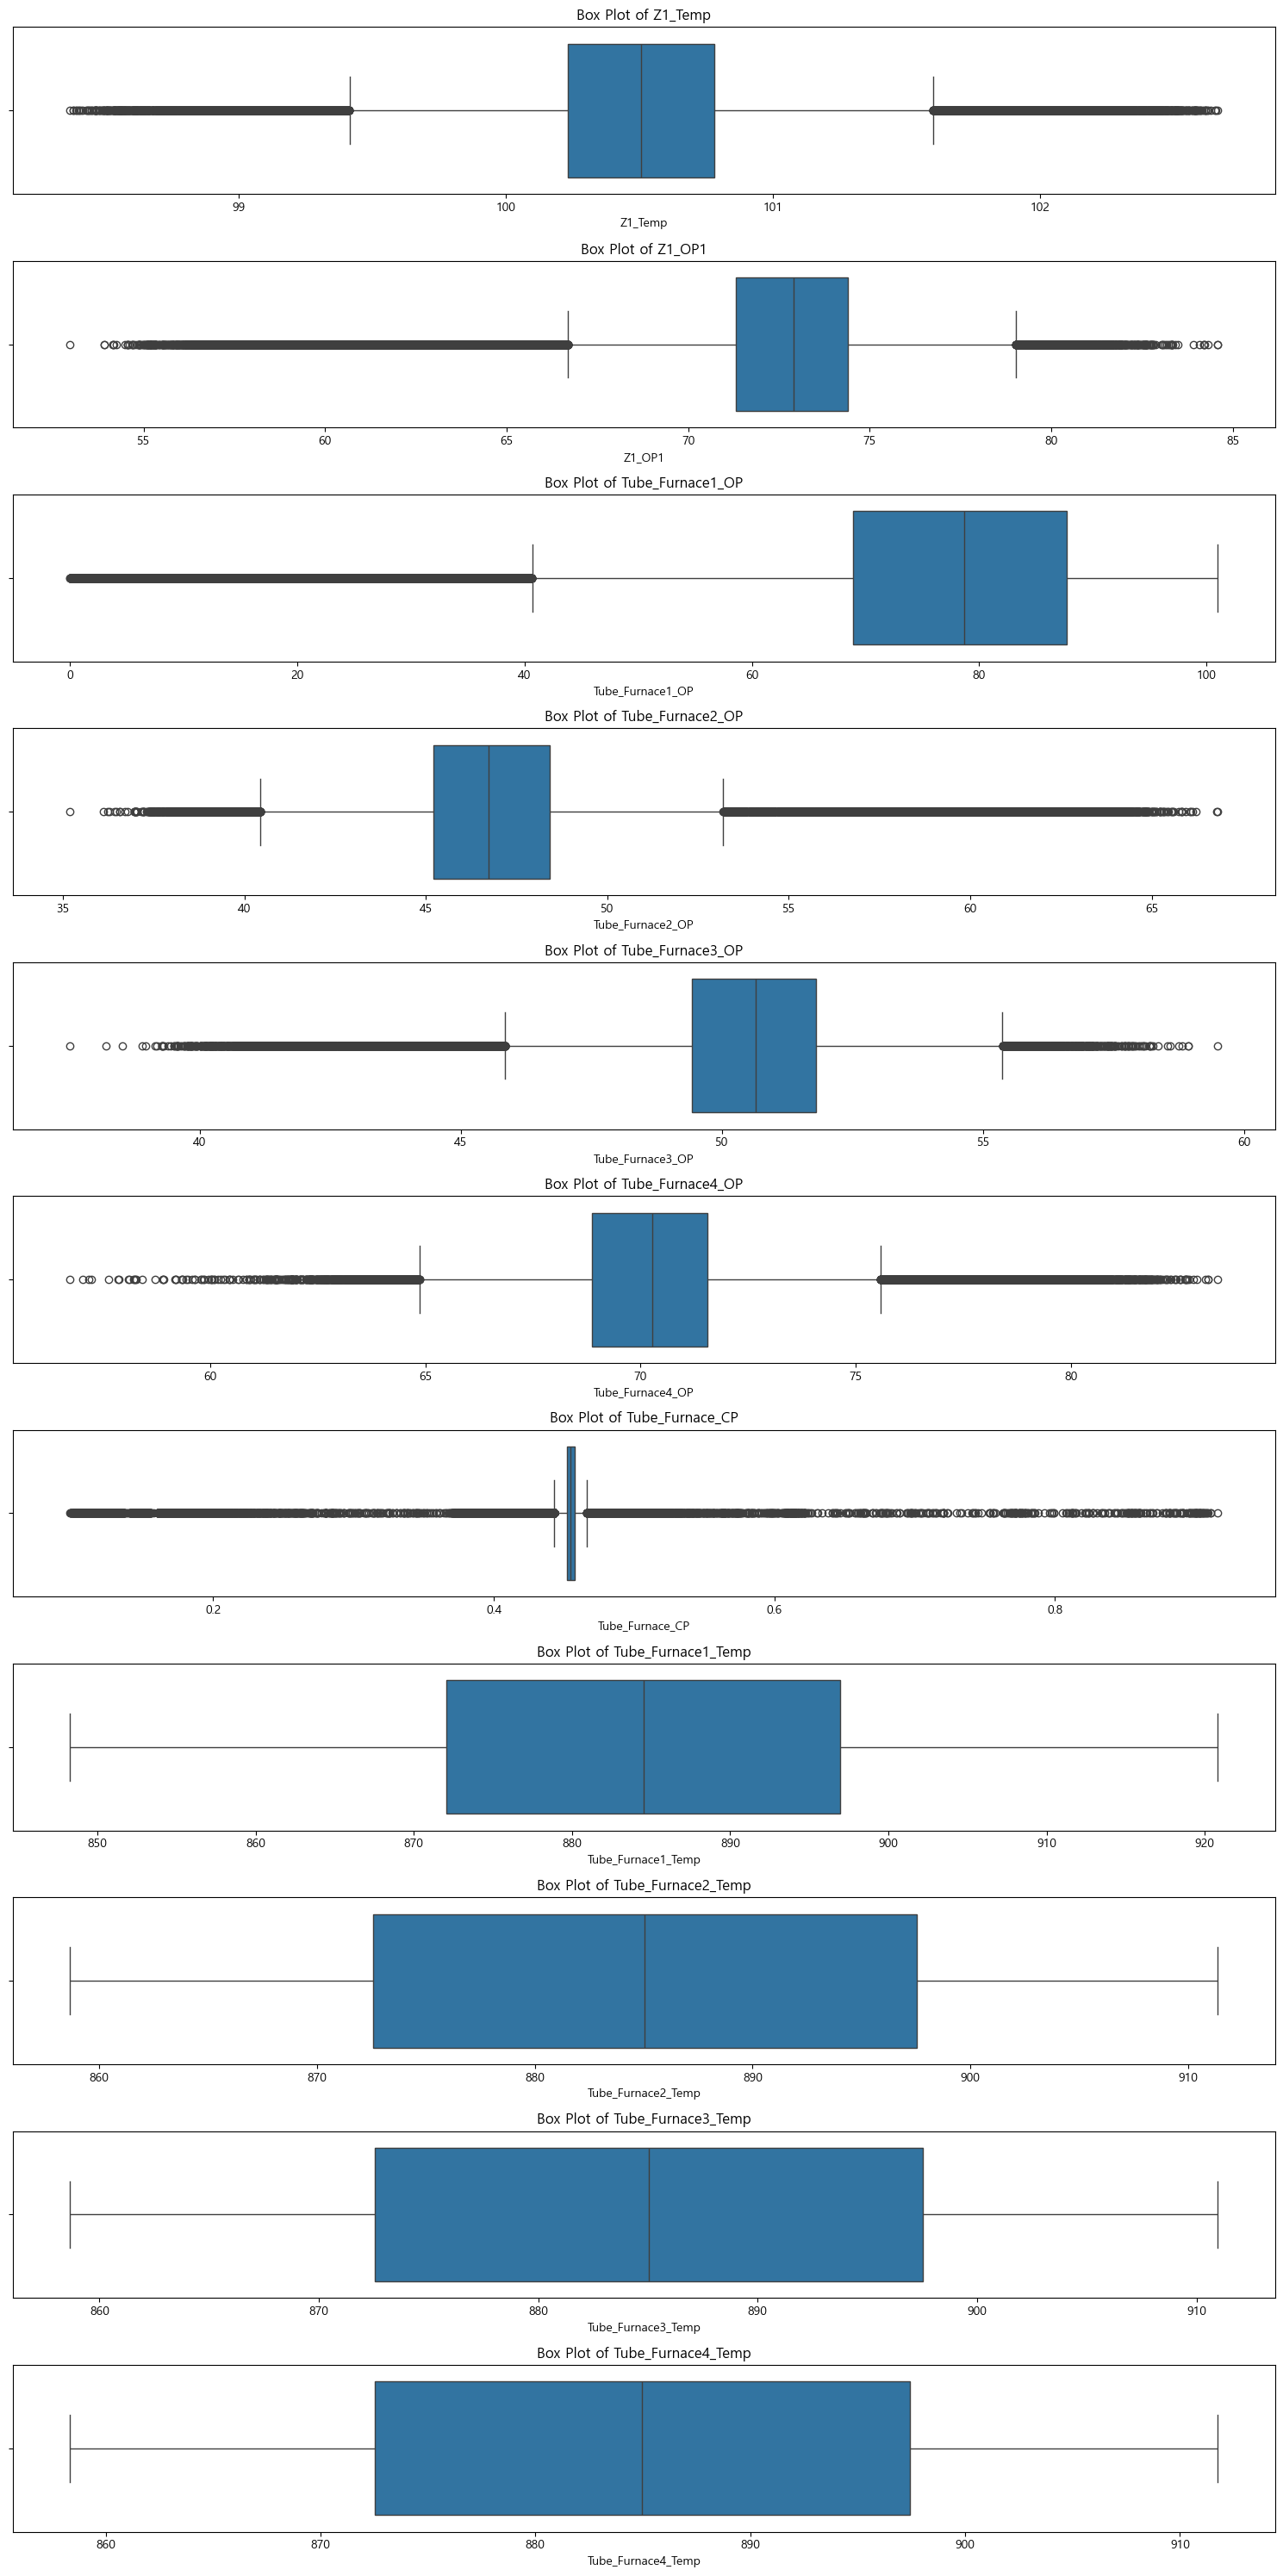

In [19]:
# 박스 플롯 그리기 위한 컬럼 리스트
boxplot_columns = ['Z1_Temp', 'Z1_OP1', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 
                   'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP', 
                   'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 
                   'Tube_Furnace4_Temp']
# 박스 플롯 그리기
plt.figure(figsize=(15, 30))
for i, col in enumerate(boxplot_columns, 1):
    plt.subplot(len(boxplot_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Z1_Temp', 'Z1_OP1', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_C 이상치 있는 컬럼

# Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp' 의 컬럼 데이터 들은 이상치가 없다.

- 이상치 탐지: 각 X 변수에 대해 IQR(Interquartile Range)을 사용하여 이상치를 탐지합니다.
- Y 값 정의: 각 변수의 이상치 여부를 바탕으로 새로운 Y 값을 정의합니다.
- 각 변수에 대해 이상치가 존재하면 해당 레코드에 대해 Y 값을 1로 설정하고, 그렇지 않으면 0으로 설정합니다.
- 오전/오후 비교: Y 값(이상치 여부)을 기준으로 오전과 오후에 이상치가 많이 발생하는지 비교합니다.
- 파생 변수 생성: 각 변수의 이상치 개수를 카운팅하여 새로운 파생 변수를 생성하고, 이를 기준으로 Y 값을 설정합니다.
- 분석: X 변수와 Y 값 간의 상관관계를 분석합니다.

In [22]:
# 1. 이상치 탐지: 각 X 변수에 대해 IQR(Interquartile Range)을 사용하여 이상치를 탐지합니다.
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    return outliers


In [23]:
outlier_columns = ['Z1_Temp', 'Z1_OP1', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 
                   'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP', 
                   'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 
                   'Tube_Furnace4_Temp']

# 파생 변수 생성 (이상치 개수 카운팅)
df['outlier_count'] = 0

for col in outlier_columns:
    outliers = detect_outliers_iqr(df, col)
    df['outlier_count'] += outliers

# Y 값 생성 (기준선 설정)
threshold = 1  # 기준선 (기본값: 1, 상황에 따라 조정 가능) # 3부터 유의미하지않은 변수가 나왔슴
df['Y'] = df['outlier_count'].apply(lambda x: 1 if x >= threshold else 0)

# 1개 이상을 Y로 1로 보겠다. 이유는 딱히 없다.

(array([1.72375e+05, 0.00000e+00, 4.27260e+04, 0.00000e+00, 1.18000e+04,
        0.00000e+00, 3.41400e+03, 0.00000e+00, 4.95000e+02, 2.90000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

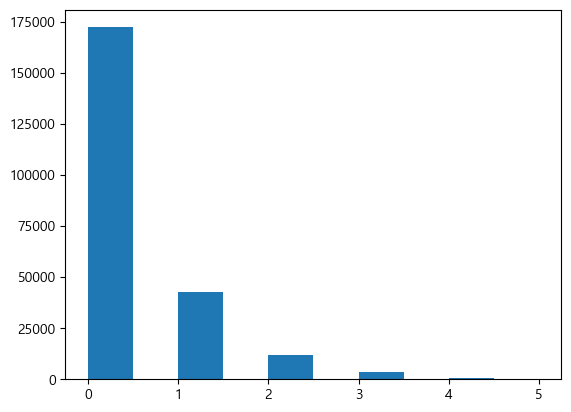

In [75]:
plt.hist(df['outlier_count'])

#### IQR 방식으로 0은 양품 1이상의 이상치를 불량으로 선정

In [24]:
df['outlier_count'].value_counts()

outlier_count
0    172375
1     42726
2     11800
3      3414
4       495
5        29
Name: count, dtype: int64

In [25]:
df

,Process_Type,Datetime,Code_Num,Z1_Temp,Z1_OP1,ST,Tube_Furnace1_OP,Tube_Furnace2_OP,Tube_Furnace3_OP,Tube_Furnace4_OP,Tube_Furnace_CP,Tube_Furnace1_Temp,Tube_Furnace2_Temp,Tube_Furnace3_Temp,Tube_Furnace4_Temp,Datetime_dt,outlier_count,Y
2,OP-A,2022-01-03 11:22,GroupA,99.614201,75.6776,68.724636,78.946336,62.235532,52.218350,72.705558,0.454914,866.441979,882.850031,864.373065,893.530501,2022-01-03 11:22:00,1,1
3,OP-A,2022-01-03 11:22,GroupA,99.376221,75.8656,69.161116,78.445719,61.608260,52.863552,73.975640,0.456540,876.350472,906.208463,891.107865,896.347636,2022-01-03 11:22:00,2,1
4,OP-C,2022-01-03 11:22,GroupA,99.809053,73.6468,69.181098,76.673808,61.589311,52.297196,71.887865,0.460100,903.587678,867.215131,893.206883,871.594283,2022-01-03 11:22:00,1,1
5,OP-C,2022-01-03 11:22,GroupA,99.770424,76.0051,69.472810,76.161977,61.131382,52.514548,71.805968,0.459051,893.336100,901.009384,891.501638,882.495792,2022-01-03 11:22:00,1,1
6,OP-C,2022-01-03 11:22,GroupA,99.852337,75.9804,69.189685,75.879256,59.644186,52.466639,71.868823,0.459515,898.617693,889.460401,864.222256,877.136764,2022-01-03 11:22:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231118,OP-C,2022-01-15 19:49,GroupD,100.202264,73.5343,68.405244,84.369599,43.864803,52.731835,71.606995,0.453212,875.288592,895.764797,869.150410,892.129335,2022-01-15 19:49:00,0,0
231119,OP-C,2022-01-15 19:49,GroupD,100.219542,73.5343,68.526229,85.214740,43.807730,52.788213,71.634139,0.451906,881.480945,888.820207,876.529220,884.019949,2022-01-15 19:49:00,0,0
231120,OP-C,2022-01-15 19:49,GroupD,101.141937,73.4839,68.877919,86.438976,44.946023,53.315676,72.529658,0.455600,868.731699,863.224662,883.589334,899.204662,2022-01-15 19:49:00,0,0
231121,OP-C,2022-01-15 19:49,GroupD,100.397590,73.4839,69.092723,86.214394,43.979252,53.533784,71.268777,0.452067,861.692367,905.774959,860.538841,902.815192,2022-01-15 19:49:00,0,0


### 시간대를 3교대를 기준으로 오전 오후 야간근무로 파생변수 생성 후 가설검정 진행


In [108]:

# 파생변수 생성
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Weekday'] = df['Datetime'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)
def hour_slot(x):
    if x >= 6 and x < 14:
        return 'day'
    elif x >= 14 and x < 22:
        return 'evening'
    else:
        return 'night'
df['hour_slot'] = df['Datetime'].dt.hour.apply(hour_slot)

#### 범주 범주 데이터이기 때문에 카이제곱 검정을 진행

Chi-squared test
Chi2 statistic: 25465.655717510916
P-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[ 37211.92421991  78154.52436547  57008.55141462 172375.        ]
 [ 12621.07578009  26507.47563453  19335.44858538  58464.        ]]


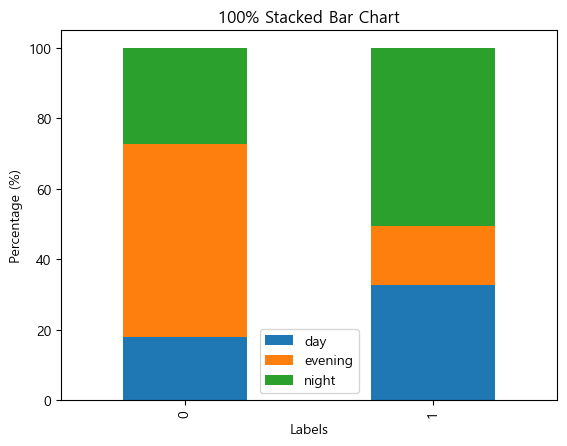

In [87]:
from scipy.stats import chi2_contingency
# 카이제곱 검정
# 교차표 생성
contingency_table = pd.crosstab(df['Y'], df['hour_slot'])
contingency_table['Total'] = contingency_table.sum(axis=1)
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)
# 결과 출력
print("Chi-squared test")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Normalize each group to sum up to 100%
for col in ['day', 'evening', 'night']:
    contingency_table[col] = contingency_table[col] / contingency_table['Total'] * 100
df_group_100 = contingency_table.drop('Total', axis=1)
df_group_100.plot(kind='bar', stacked=True)
# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()
# Show the plot
plt.show()

#### 근무 시간대(3교대)별로 설비이상여부에 차이가 있는지 확인
#### 귀무가설 : 근무 시간대(3교대)별로 설비이상여부에 차이가 없다.
#### 대립가설 : 근무 시간대(3교대)별로 설비이상여부에  차이가 있다.
#### p-value가 0.05 이하이므로 귀무가설을 기각한다. 즉, 근무 시간대(3교대)별로 설비이상여부에 차이가 있다.



In [93]:
# 소입로의 침탄 가스 침탄량
# 등분산성 검정
df_err = df[df['Y'] == 1]
df_norm = df[df['Y'] == 0]
stats.bartlett(df_err['Tube_Furnace_CP'], df_norm['Tube_Furnace_CP'])
# 등분산성 가지지 않음

# 2 sample t-test
t_result = stats.ttest_ind(df_err['Tube_Furnace_CP'], df_norm['Tube_Furnace_CP'], equal_var=False)
t, p = t_result.statistic, t_result.pvalue
print('2-Sample t-test')
print(f't : {t}')
print(f'p-value : {p}')

# 소입론의 침탄 가스 침탄량과 설비 이상 사이에는 ㄴ . 정상일때 가스량이 많다. 

2-Sample t-test
t : -58.981261566534904
p-value : 0.0


- 귀무가설: 소입로 가스 침탄량과 설비 이상 사이에는 관련이 없다.
- 대립가설: 소입로 가스 침탄량과 설비 이상 사이에는 관련이 있다.
p-value 가 0.05보다 작으므로 귀무가설 기각
소입로 침탄 가스 침탄량과 설비 이상 사이에는 관련이 있다.
정상일때 가스량이 많다.

In [95]:
crosstab_result = pd.crosstab(df['Y'], df['Process_Type'])
crosstab_result

Process_Type,OP-A,OP-B,OP-C
Y,,,
0,27,24578,147770
1,514,23512,34438


In [97]:
chi, pval, dof, expected = stats.chi2_contingency(crosstab_result)
print('chi square test')
print('chi2 : {0:.3f}'.format(chi))
print('p-value : {0:.3f}'.format(pval))
print('degree of freedom : {0:.3f}'.format(dof))
print('expected value : \n{}'.format(expected))

#

chi square test
chi2 : 19488.054
p-value : 0.000
degree of freedom : 2.000
expected value : 
[[   403.98232101  35910.36934833 136060.64833065]
 [   137.01767899  12179.63065167  46147.35166935]]


In [99]:
crosstab_result['Total'] = crosstab_result.sum(axis=1)
crosstab_result


Process_Type,OP-A,OP-B,OP-C,Total
Y,,,,
0,27,24578,147770,172375
1,514,23512,34438,58464


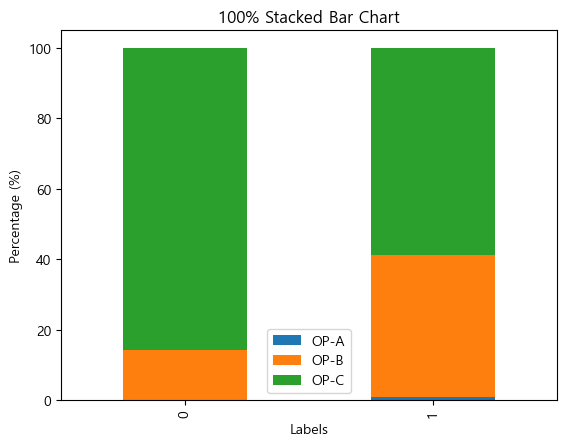

In [101]:
# Normalize each group to sum up to 100%
for col in ['OP-A','OP-B','OP-C']:
    crosstab_result[col] = crosstab_result[col] / crosstab_result['Total'] * 100
df_group_100 = crosstab_result.drop('Total', axis=1)
df_group_100.plot(kind='bar', stacked=True)
# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()
# Show the plot
plt.show()

In [116]:
# Process_Type별로 불량율에 차이가 있는지 확인
# 귀무가설 : Process_Type별로 설비이상 여부에 차이가 없다.
# 대립가설 : Process_Type별로 설비이상 여부에 차이가 있다.
# p-value가 0.05 이하이므로 귀무가설을 기각한다. 즉, Process_Type별로 설비이상 여부에 차이가 있다.

# 그래프를 통해 확인해본결과 정상데이터(1)보다 불량데이터인(1)에서 OP-B값이 유의미한 변화가 있는것으로 판단됨

오전의 이상치 개수: 30686
오후의 이상치 개수: 27778
Z1_Temp               0.060606
Z1_OP1               -0.199238
ST                    0.201783
Tube_Furnace1_OP     -0.364597
Tube_Furnace2_OP      0.414471
Tube_Furnace3_OP     -0.110732
Tube_Furnace4_OP      0.091456
Tube_Furnace_CP      -0.205759
Tube_Furnace1_Temp    0.022901
Tube_Furnace2_Temp    0.002373
Tube_Furnace3_Temp    0.001367
Tube_Furnace4_Temp   -0.001312
outlier_count         0.878567
Hour                 -0.206181
Name: Y, dtype: float64


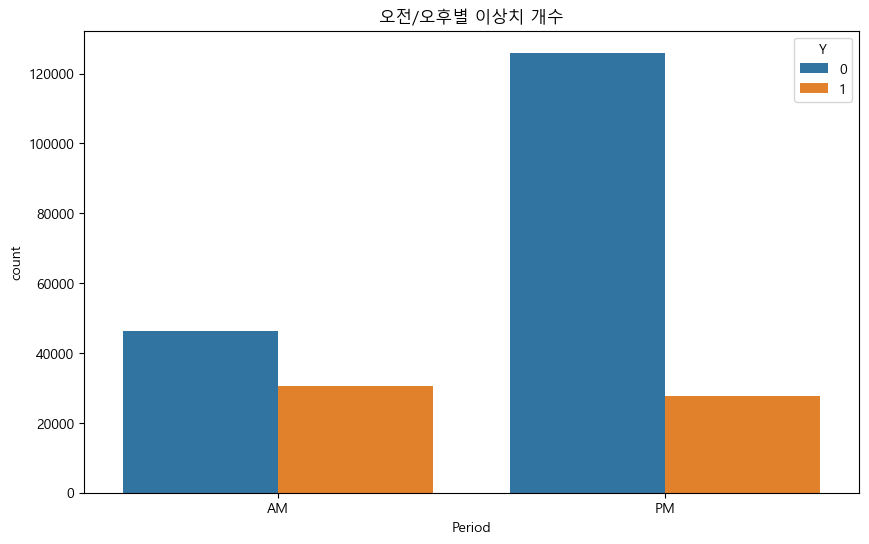

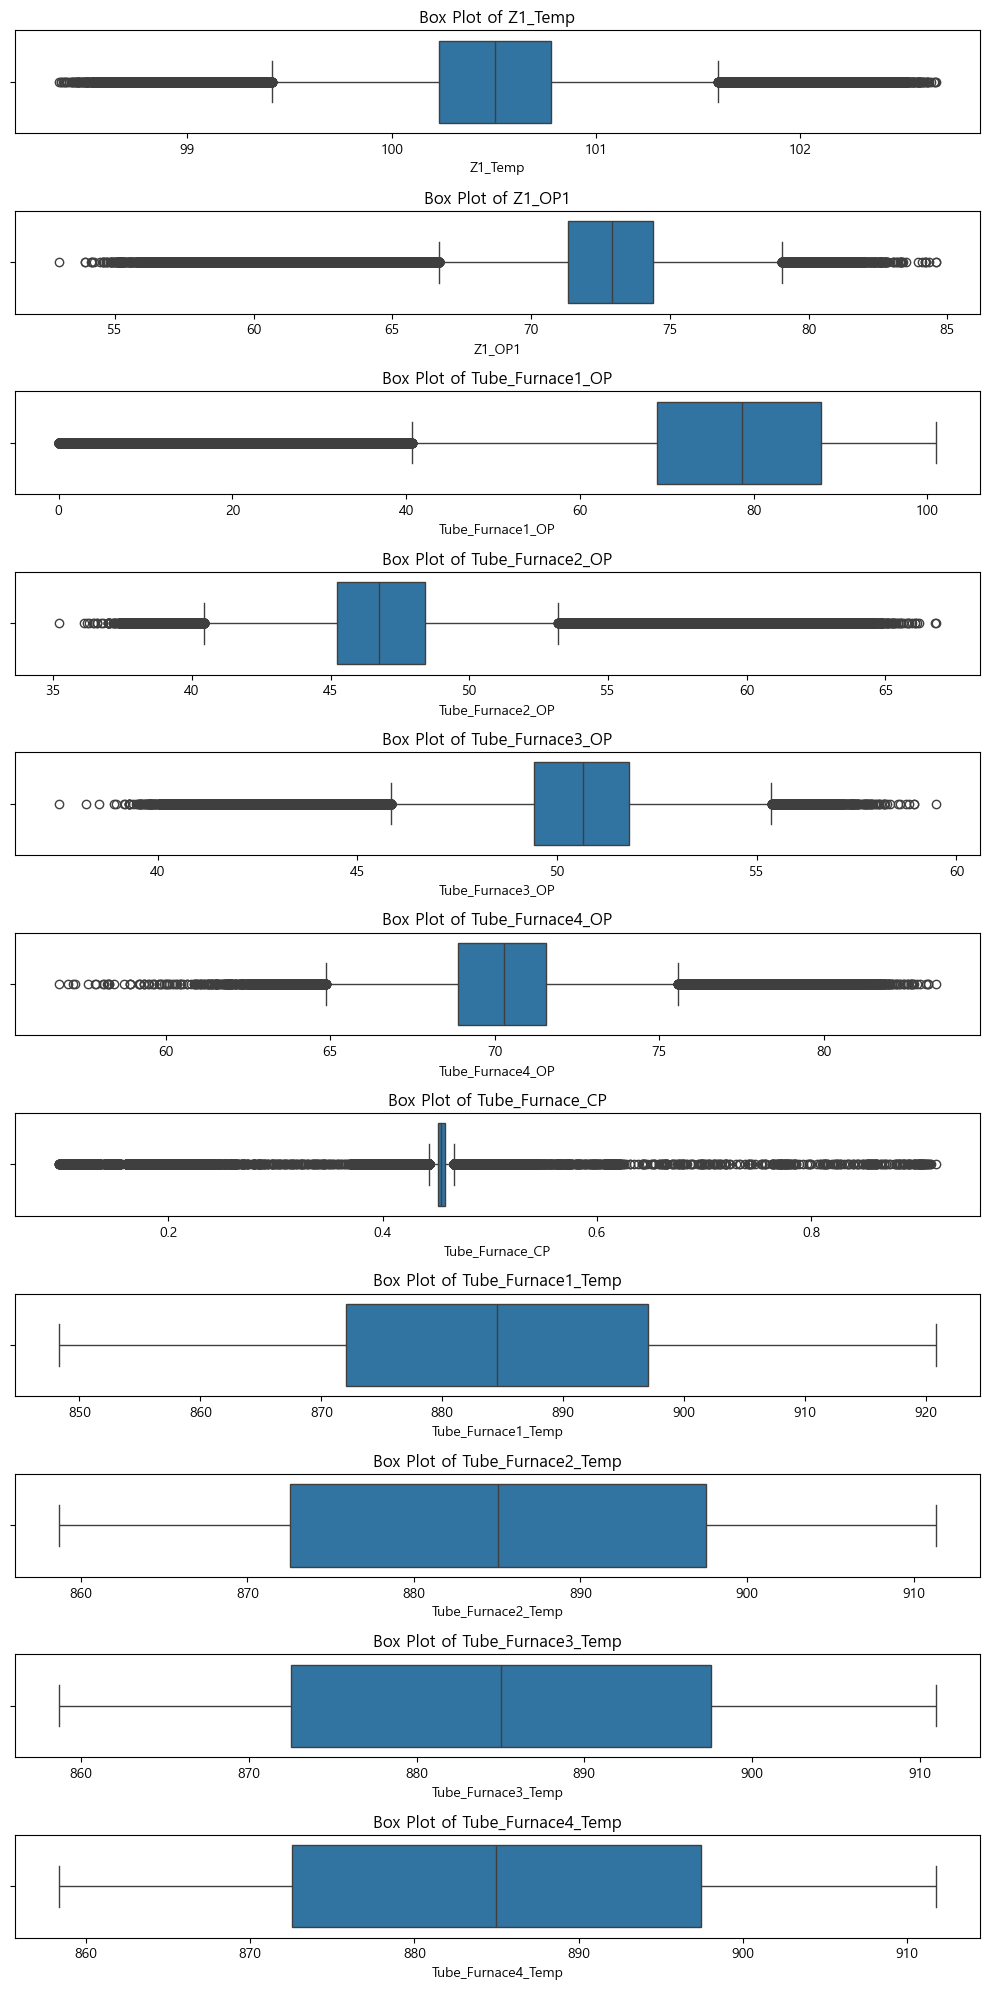

In [27]:

df['Hour'] = df['Datetime_dt'].dt.hour
df['Period'] = df['Hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

# 오전/오후별 Y 값 비교
am_outliers = df[df['Period'] == 'AM']['Y'].sum()
pm_outliers = df[df['Period'] == 'PM']['Y'].sum()

print("오전의 이상치 개수:", am_outliers)
print("오후의 이상치 개수:", pm_outliers)

# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# X 변수와 Y 값 간의 상관관계 분석
correlations = numeric_df.corr()['Y'].drop('Y')
print(correlations)

# 시각화 (필요시)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Period', hue='Y')
plt.title('오전/오후별 이상치 개수')
plt.show()

# 박스 플롯 그리기 위한 컬럼 리스트
outlier_columns = ['Z1_Temp', 'Z1_OP1', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 
                   'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP', 
                   'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 
                   'Tube_Furnace4_Temp']

# 각 X 변수의 Box Plot
plt.figure(figsize=(10, 20))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


상관계수 해설:

- Z1_Temp (공정 건조 온도 유지 출력량) (0.060606): Y와 약한 양의 상관관계가 있습니다. Z1_Temp가 증가하면 Y도 약간 증가하는 경향이 있습니다.
  - 공정 건조 온도 유지 출력량이 증가하면 이상치가 약간 증가한다
- Z1_OP1 (-0.199238): Y와 약한 음의 상관관계가 있습니다. Z1_OP1이 증가하면 Y는 감소하는 경향이 있습니다.
   - 공정 건조로 온도가 증가하면 이상치가 감소한다
- ST (0.201783): Y와 약한 양의 상관관계가 있습니다. ST가 증가하면 Y도 증가하는 경향이 있습니다.
   - 세정기 온도가 증가하면 이상치가 증가한다.
- Tube_Furnace1_OP (-0.364597): Y와 중간 정도의 음의 상관관계가 있습니다. Tube_Furnace1_OP가 증가하면 Y는 감소하는 경향이 있습니다.
   - 소입존1 구역 온도 유지 출력량이 증가하면 이상치가 감소한다?
- Tube_Furnace2_OP (0.414471): Y와 중간 정도의 양의 상관관계가 있습니다. Tube_Furnace2_OP가 증가하면 Y도 증가하는 경향이 있습니다.
   - 소입존2 구역 온도 유지 출력량이 증가하면 이상치가 많아진다?
- Tube_Furnace3_OP (-0.110732): Y와 약한 음의 상관관계가 있습니다. Tube_Furnace3_OP가 증가하면 Y는 감소하는 경향이 있습니다.
   - 소입존3 구역 온도 유지 출력량이 증가하면 이상치가 감소한다?
- Tube_Furnace4_OP (0.091456): Y와 약한 양의 상관관계가 있습니다. Tube_Furnace4_OP가 증가하면 Y도 증가하는 경향이 있습니다.
   - 소입존4 구역 온도 유지 출력량이 증가하면 이상치가 증가한다?
- Tube_Furnace_CP (-0.205759): Y와 약한 음의 상관관계가 있습니다. Tube_Furnace_CP가 증가하면 Y는 감소하는 경향이 있습니다.
   - 소입로의 침탄 가스 침탄량이 증가하면 이상치가 감소한다.
- Hour (-0.206181): Y와 약한 음의 상관관계가 있습니다. Hour가 증가하면 Y는 감소하는 경향이 있습니다. 

Tube_Furnace1_Temp (0.022901): Y와 거의 상관관계가 없습니다. (소입존 입구 온도 측정값)

Tube_Furnace2_Temp (0.002373): Y와 거의 상관관계가 없습니다.

Tube_Furnace3_Temp (0.001367): Y와 거의 상관관계가 없습니다.

Tube_Furnace4_Temp (-0.001312): Y와 거의 상관관계가 없습니다.

outlier_count (0.878567): Y와 매우 강한 양의 상관관계가 있습니다. outlier_count가 증가하면 Y도 증가하는 경향이 있습니다. 이상치 개수이므로 제외


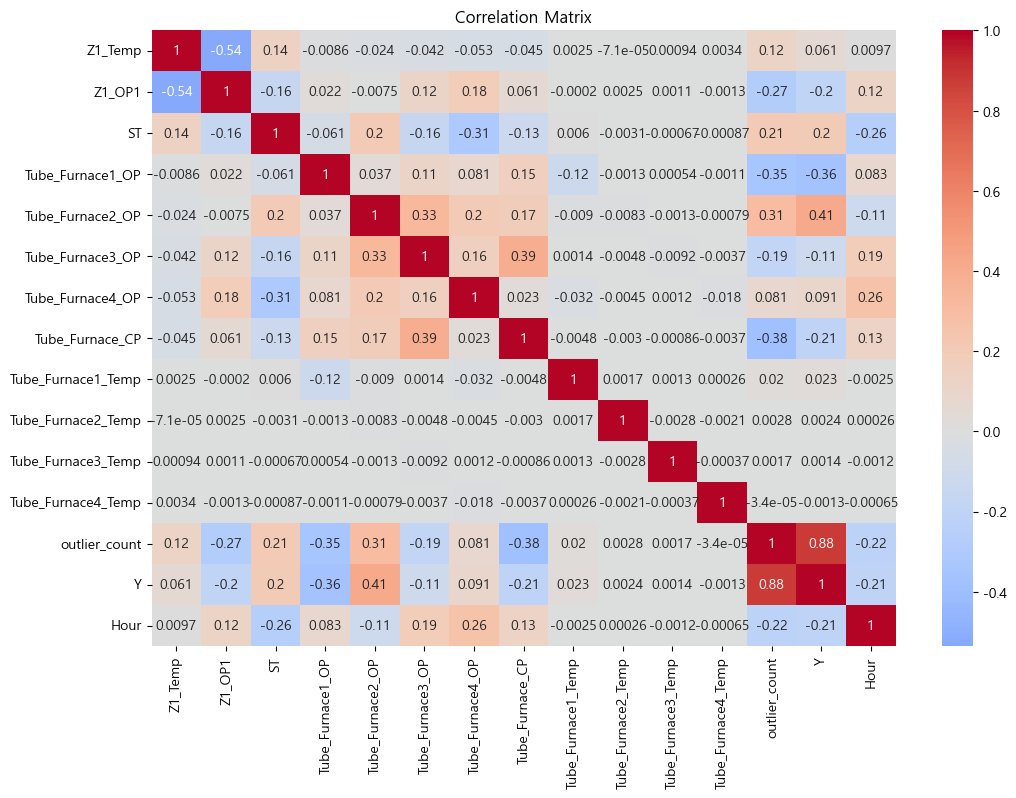

In [29]:
# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관관계 행렬
corr_matrix = numeric_df.corr()

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# p-value 계산
def calculate_pvalues(df):
    df_numeric = df.select_dtypes(include=[np.number])
    pvalues = pd.DataFrame(columns=df_numeric.columns, index=df_numeric.columns)
    for col1 in df_numeric.columns:
        for col2 in df_numeric.columns:
            _, pvalue = stats.pearsonr(df_numeric[col1], df_numeric[col2])
            pvalues.loc[col1, col2] = pvalue
    return pvalues




In [30]:
# P-value 계산 함수
def calculate_pvalues(df):
    df_numeric = df.select_dtypes(include=[np.number])
    pvalues = pd.Series(index=df_numeric.columns)
    for col in df_numeric.columns:
        if col == 'Y':
            continue
        _, pvalue = stats.pearsonr(df_numeric[col], df_numeric['Y'])
        pvalues[col] = pvalue
    return pvalues

# P-value 계산 및 출력
pvalues = calculate_pvalues(numeric_df)
print("\nP-values:\n", pvalues)



P-values:
 Z1_Temp               9.619377e-187
Z1_OP1                 0.000000e+00
ST                     0.000000e+00
Tube_Furnace1_OP       0.000000e+00
Tube_Furnace2_OP       0.000000e+00
Tube_Furnace3_OP       0.000000e+00
Tube_Furnace4_OP       0.000000e+00
Tube_Furnace_CP        0.000000e+00
Tube_Furnace1_Temp     3.639780e-28
Tube_Furnace2_Temp     2.542862e-01
Tube_Furnace3_Temp     5.112777e-01
Tube_Furnace4_Temp     5.284130e-01
outlier_count          0.000000e+00
Y                               NaN
Hour                   0.000000e+00
dtype: float64


In [31]:
# Z1_OP1                 0.000000e+00
# ST                     0.000000e+00
# Tube_Furnace1_OP       0.000000e+00
# Tube_Furnace2_OP       0.000000e+00
# Tube_Furnace3_OP       0.000000e+00
# Tube_Furnace4_OP       0.000000e+00
# Tube_Furnace_CP        0.000000e+00
# Hour                   0.000000e+00

# 유의미한 관계가 있다.

In [32]:
# 총 개수
am_total = len(df[df['Period'] == 'AM'])
pm_total = len(df[df['Period'] == 'PM'])

# 오전/오후별 이상치 비율
am_outlier_rate = am_outliers / am_total
pm_outlier_rate = pm_outliers / pm_total

print("오전의 이상치 비율:", am_outlier_rate)
print("오후의 이상치 비율:", pm_outlier_rate)

# 카이제곱 검정
observed = [am_outliers, pm_outliers]
expected = [am_total * (am_outliers + pm_outliers) / (am_total + pm_total), pm_total * (am_outliers + pm_outliers) / (am_total + pm_total)]

chi2, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print("\n카이제곱 검정 결과:")
print("Chi-squared:", chi2)
print("P-value:", p_value)

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("대립가설을 채택합니다: 오전과 오후의 이상치 발생 빈도에 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다: 오전과 오후의 이상치 발생 빈도에 차이가 없습니다.")

오전의 이상치 비율: 0.3980077562614301
오후의 이상치 비율: 0.18068167035254326

카이제곱 검정 결과:
Chi-squared: 9575.706204563268
P-value: 0.0
대립가설을 채택합니다: 오전과 오후의 이상치 발생 빈도에 차이가 있습니다.


오전 시간대 변수의 평균값:
 Z1_Temp               100.513322
Z1_OP1                 72.059793
ST                     69.710897
Tube_Furnace1_OP       71.559243
Tube_Furnace2_OP       47.852829
Tube_Furnace3_OP       49.827463
Tube_Furnace4_OP       69.298111
Tube_Furnace_CP         0.436868
Tube_Furnace1_Temp    884.669413
Tube_Furnace2_Temp    885.014297
Tube_Furnace3_Temp    885.036513
Tube_Furnace4_Temp    885.015339
outlier_count           0.579982
Y                       0.398008
Hour                    4.939662
dtype: float64

오후 시간대 변수의 평균값:
 Z1_Temp               100.507732
Z1_OP1                 72.904506
ST                     68.782230
Tube_Furnace1_OP       77.189982
Tube_Furnace2_OP       47.421265
Tube_Furnace3_OP       50.886116
Tube_Furnace4_OP       70.724431
Tube_Furnace_CP         0.456106
Tube_Furnace1_Temp    884.479458
Tube_Furnace2_Temp    885.054207
Tube_Furnace3_Temp    885.022449
Tube_Furnace4_Temp    884.972073
outlier_count           0.221003
Y                       0.

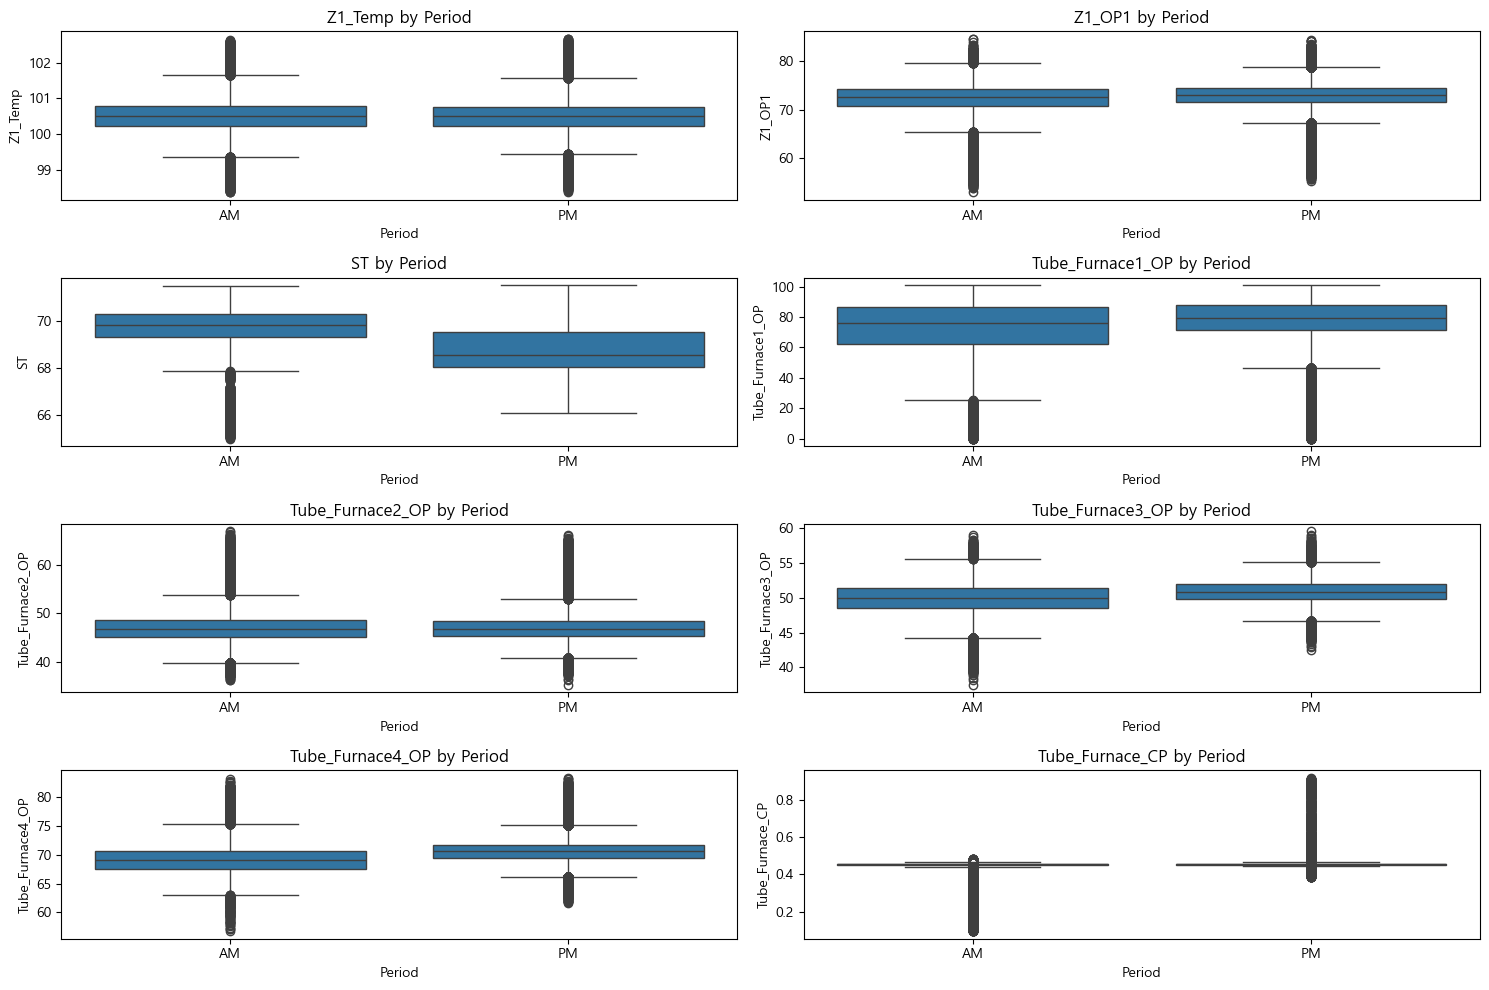


오전 시간대 변수와 Y의 상관관계:
 Z1_Temp               0.081868
Z1_OP1               -0.208109
ST                    0.077133
Tube_Furnace1_OP     -0.383731
Tube_Furnace2_OP      0.365776
Tube_Furnace3_OP     -0.099158
Tube_Furnace4_OP      0.196606
Tube_Furnace_CP      -0.314100
Tube_Furnace1_Temp    0.037885
Tube_Furnace2_Temp   -0.000150
Tube_Furnace3_Temp   -0.002867
Tube_Furnace4_Temp   -0.000966
outlier_count         0.850571
Hour                 -0.138939
Name: Y, dtype: float64

오후 시간대 변수와 Y의 상관관계:
 Z1_Temp               0.044566
Z1_OP1               -0.145463
ST                    0.146221
Tube_Furnace1_OP     -0.316945
Tube_Furnace2_OP      0.458452
Tube_Furnace3_OP     -0.012297
Tube_Furnace4_OP      0.154064
Tube_Furnace_CP       0.137815
Tube_Furnace1_Temp    0.012145
Tube_Furnace2_Temp    0.004640
Tube_Furnace3_Temp    0.003962
Tube_Furnace4_Temp   -0.002177
outlier_count         0.904351
Hour                  0.089413
Name: Y, dtype: float64

오전 시간대 변수의 p-values:
 Z1_Temp          

In [33]:
# 각 변수의 시간대별 평균 비교 (숫자형 데이터만 선택)
mean_values_am = df[df['Period'] == 'AM'].select_dtypes(include=[np.number]).mean()
mean_values_pm = df[df['Period'] == 'PM'].select_dtypes(include=[np.number]).mean()

print("오전 시간대 변수의 평균값:\n", mean_values_am)
print("\n오후 시간대 변수의 평균값:\n", mean_values_pm)

# 각 변수의 시간대별 분포 비교
plt.figure(figsize=(15, 10))
variables = ['Z1_Temp', 'Z1_OP1', 'ST', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP']
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Period', y=var, data=df)
    plt.title(f'{var} by Period')
plt.tight_layout()
plt.show()

# 각 변수의 시간대별 상관관계 분석 (숫자형 데이터만 선택)
am_corr = df[df['Period'] == 'AM'].select_dtypes(include=[np.number]).corr()['Y'].drop('Y')
pm_corr = df[df['Period'] == 'PM'].select_dtypes(include=[np.number]).corr()['Y'].drop('Y')

print("\n오전 시간대 변수와 Y의 상관관계:\n", am_corr)
print("\n오후 시간대 변수와 Y의 상관관계:\n", pm_corr)

# P-value 계산 및 출력 함수 재정의
def calculate_pvalues(df):
    df_numeric = df.select_dtypes(include=[np.number])
    pvalues = pd.Series(index=df_numeric.columns)
    for col in df_numeric.columns:
        if col == 'Y':
            continue
        _, pvalue = stats.pearsonr(df_numeric[col], df_numeric['Y'])
        pvalues[col] = pvalue
    return pvalues

# 오전과 오후의 p-value 계산 및 출력
am_pvalues = calculate_pvalues(df[df['Period'] == 'AM'])
pm_pvalues = calculate_pvalues(df[df['Period'] == 'PM'])

print("\n오전 시간대 변수의 p-values:\n", am_pvalues)
print("\n오후 시간대 변수의 p-values:\n", pm_pvalues)

In [34]:
df['Hour'].value_counts().sort_values()

Hour
10     3468
9      3477
3      3478
8      4659
2      4684
11     6501
12     6966
7      6968
1      7004
4      7435
6      8120
13     9674
20    10400
5     10409
21    10412
0     10896
19    13336
17    13897
18    13910
16    13952
15    13970
14    14785
22    14945
23    17493
Name: count, dtype: int64

오전 시간대 변수의 평균값:
 Z1_Temp               100.513322
Z1_OP1                 72.059793
ST                     69.710897
Tube_Furnace1_OP       71.559243
Tube_Furnace2_OP       47.852829
Tube_Furnace3_OP       49.827463
Tube_Furnace4_OP       69.298111
Tube_Furnace_CP         0.436868
Tube_Furnace1_Temp    884.669413
Tube_Furnace2_Temp    885.014297
Tube_Furnace3_Temp    885.036513
Tube_Furnace4_Temp    885.015339
outlier_count           0.579982
Y                       0.398008
Hour                    4.939662
dtype: float64

오후 시간대 변수의 평균값:
 Z1_Temp               100.507732
Z1_OP1                 72.904506
ST                     68.782230
Tube_Furnace1_OP       77.189982
Tube_Furnace2_OP       47.421265
Tube_Furnace3_OP       50.886116
Tube_Furnace4_OP       70.724431
Tube_Furnace_CP         0.456106
Tube_Furnace1_Temp    884.479458
Tube_Furnace2_Temp    885.054207
Tube_Furnace3_Temp    885.022449
Tube_Furnace4_Temp    884.972073
outlier_count           0.221003
Y                       0.

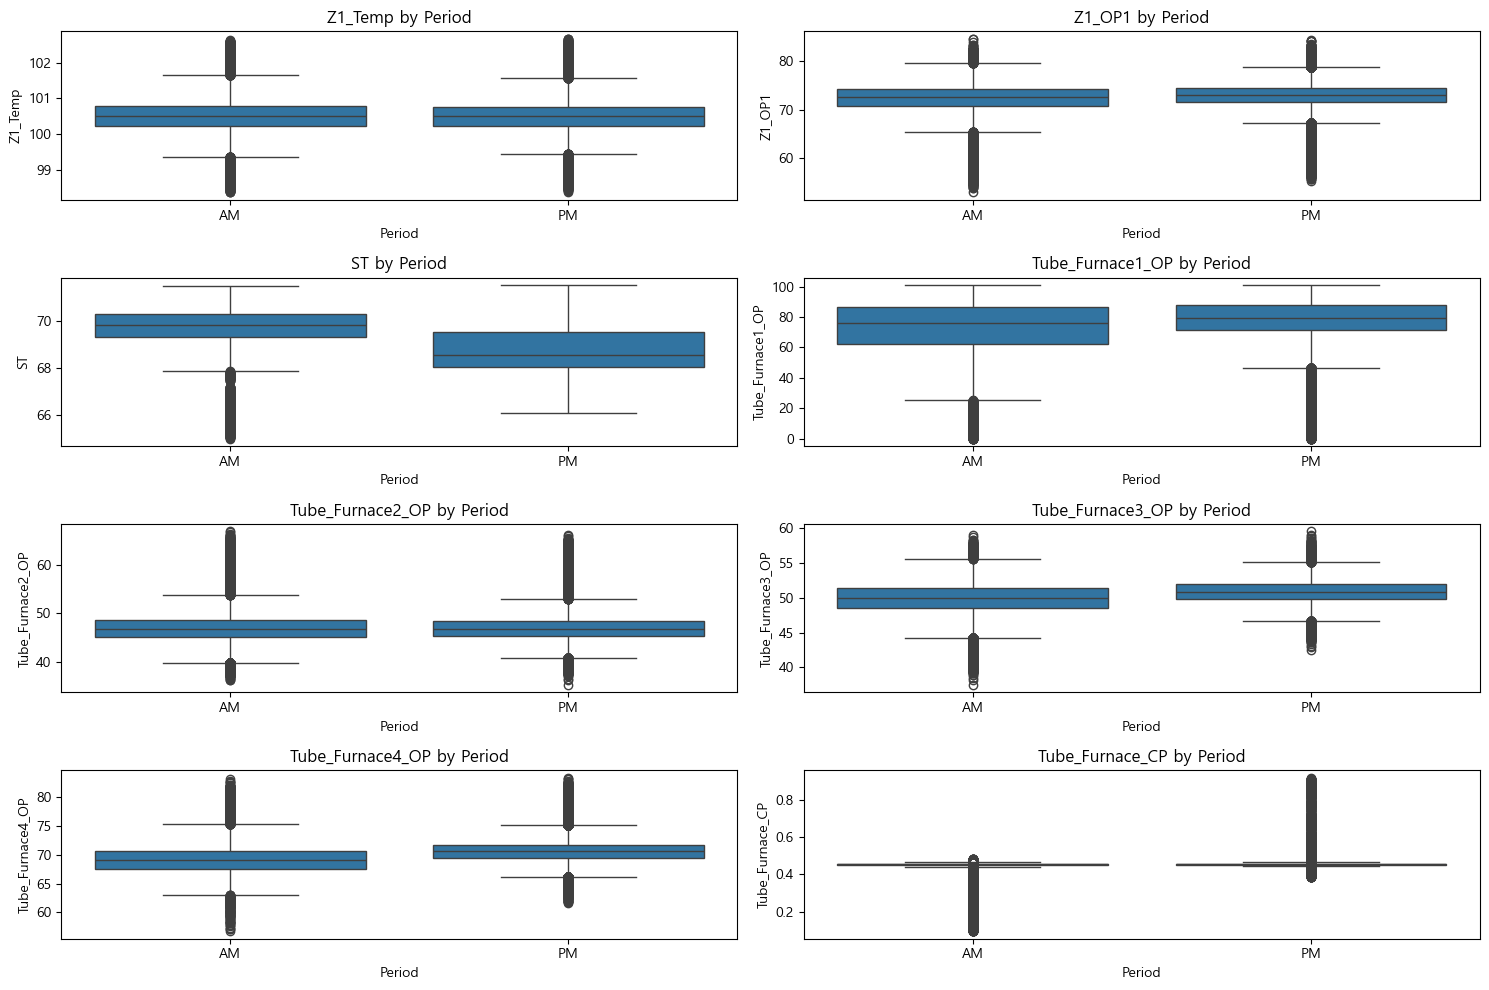


오전 시간대 변수와 Y의 상관관계:
 Z1_Temp               0.081868
Z1_OP1               -0.208109
ST                    0.077133
Tube_Furnace1_OP     -0.383731
Tube_Furnace2_OP      0.365776
Tube_Furnace3_OP     -0.099158
Tube_Furnace4_OP      0.196606
Tube_Furnace_CP      -0.314100
Tube_Furnace1_Temp    0.037885
Tube_Furnace2_Temp   -0.000150
Tube_Furnace3_Temp   -0.002867
Tube_Furnace4_Temp   -0.000966
outlier_count         0.850571
Hour                 -0.138939
Name: Y, dtype: float64

오후 시간대 변수와 Y의 상관관계:
 Z1_Temp               0.044566
Z1_OP1               -0.145463
ST                    0.146221
Tube_Furnace1_OP     -0.316945
Tube_Furnace2_OP      0.458452
Tube_Furnace3_OP     -0.012297
Tube_Furnace4_OP      0.154064
Tube_Furnace_CP       0.137815
Tube_Furnace1_Temp    0.012145
Tube_Furnace2_Temp    0.004640
Tube_Furnace3_Temp    0.003962
Tube_Furnace4_Temp   -0.002177
outlier_count         0.904351
Hour                  0.089413
Name: Y, dtype: float64

오전 시간대 변수의 p-values:
 Z1_Temp          

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 각 변수의 시간대별 평균 비교 (숫자형 데이터만 선택)
mean_values_am = df[df['Period'] == 'AM'].select_dtypes(include=[np.number]).mean()
mean_values_pm = df[df['Period'] == 'PM'].select_dtypes(include=[np.number]).mean()

print("오전 시간대 변수의 평균값:\n", mean_values_am)
print("\n오후 시간대 변수의 평균값:\n", mean_values_pm)

# 각 변수의 시간대별 분포 비교
plt.figure(figsize=(15, 10))
variables = ['Z1_Temp', 'Z1_OP1', 'ST', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP']
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Period', y=var, data=df)
    plt.title(f'{var} by Period')
plt.tight_layout()
plt.show()

# 각 변수의 시간대별 상관관계 분석 (숫자형 데이터만 선택)
am_corr = df[df['Period'] == 'AM'].select_dtypes(include=[np.number]).corr()['Y'].drop('Y')
pm_corr = df[df['Period'] == 'PM'].select_dtypes(include=[np.number]).corr()['Y'].drop('Y')

print("\n오전 시간대 변수와 Y의 상관관계:\n", am_corr)
print("\n오후 시간대 변수와 Y의 상관관계:\n", pm_corr)

# P-value 계산 함수
def calculate_pvalues(df):
    df_numeric = df.select_dtypes(include=[np.number])
    pvalues = pd.Series(index=df_numeric.columns)
    for col in df_numeric.columns:
        if col == 'Y':
            continue
        _, pvalue = stats.pearsonr(df_numeric[col], df_numeric['Y'])
        pvalues[col] = pvalue
    return pvalues

# 오전과 오후의 p-value 계산 및 출력
am_pvalues = calculate_pvalues(df[df['Period'] == 'AM'])
pm_pvalues = calculate_pvalues(df[df['Period'] == 'PM'])

print("\n오전 시간대 변수의 p-values:\n", am_pvalues)
print("\n오후 시간대 변수의 p-values:\n", pm_pvalues)

# 로지스틱 회귀 분석
# 숫자형 데이터만 선택
df_numeric = df.select_dtypes(include=[np.number])

# 특징 변수(X)와 타겟 변수(Y) 구분
X = df_numeric.drop(columns='Y')
y = df_numeric['Y']

# 데이터 분할 (훈련 데이터와 테스트 데이터로 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 각 변수의 회귀 계수와 p-value 계산
def calculate_coefficients_pvalues(model, X, y):
    # 회귀 계수와 p-value 계산
    coef = pd.Series(model.coef_[0], index=X.columns)
    pvalues = pd.Series(index=X.columns)
    
    # p-value 계산
    for col in X.columns:
        _, pvalue = stats.pearsonr(X[col], y)
        pvalues[col] = pvalue
    
    return coef, pvalues

# 회귀 계수 및 p-value
coef, pvalues = calculate_coefficients_pvalues(model, X, y)
print("\n각 변수의 회귀 계수:\n", coef)
print("\n각 변수의 p-value:\n", pvalues)

상관계수 행렬:
                      Z1_Temp    Z1_OP1        ST  Tube_Furnace1_OP  \
Z1_Temp             1.000000 -0.536286  0.144243         -0.008615   
Z1_OP1             -0.536286  1.000000 -0.155176          0.022438   
ST                  0.144243 -0.155176  1.000000         -0.060585   
Tube_Furnace1_OP   -0.008615  0.022438 -0.060585          1.000000   
Tube_Furnace2_OP   -0.024170 -0.007527  0.202028          0.037414   
Tube_Furnace3_OP   -0.042457  0.115875 -0.163484          0.114312   
Tube_Furnace4_OP   -0.053075  0.184101 -0.308618          0.081201   
Tube_Furnace_CP    -0.045017  0.060897 -0.129984          0.154557   
Tube_Furnace1_Temp  0.002541 -0.000204  0.006040         -0.120098   
Tube_Furnace2_Temp -0.000071  0.002504 -0.003079         -0.001262   
Tube_Furnace3_Temp  0.000940  0.001133 -0.000667          0.000535   
Tube_Furnace4_Temp  0.003376 -0.001338 -0.000871         -0.001123   
outlier_count       0.118606 -0.273313  0.206317         -0.350007   
Y         

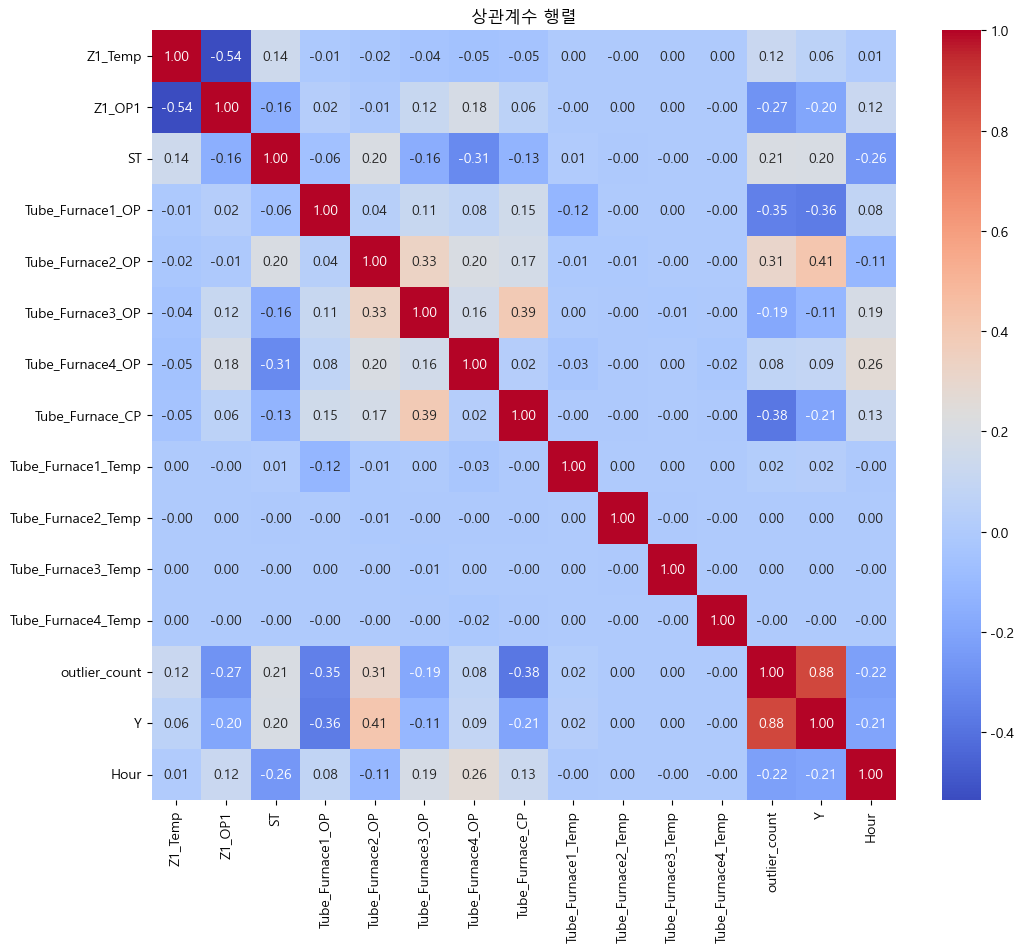

In [36]:
# 'Y'를 이상치 여부로 가정하고, X 변수 선택
# 문자열 데이터 제거
df_numeric = df.select_dtypes(include=[np.number])

# 상관계수 분석
correlations = df_numeric.corr()
print("상관계수 행렬:\n", correlations)

# 상관계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관계수 행렬')
plt.show()

In [37]:
import statsmodels.api as sm
# 공선성 문제를 해결하기 위해 상관관계가 높은 변수 제거
# 예: 상관관계가 0.9 이상인 변수 제거
high_corr_vars = [column for column in correlations.columns if any(correlations[column].abs() > 0.8) and column != 'Y']

# 해당 변수 제거
X = df_numeric.drop(columns=['Y'] + high_corr_vars)
y = df_numeric['Y']

# 회귀 분석에 사용할 데이터 추가
X = sm.add_constant(X)  # 상수항 추가

# 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 회귀 분석 결과 출력
print(result.summary())

# 회귀 계수 및 p-value 추출
coefficients = result.params
p_values = result.pvalues

print("\n회귀 계수:\n", coefficients)
print("\n각 변수의 p-value:\n", p_values)


Optimization terminated successfully.
         Current function value: 0.565896
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:               230839
Model:                          Logit   Df Residuals:                   230838
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:               2.080e-11
Time:                        15:11:46   Log-Likelihood:            -1.3063e+05
converged:                       True   LL-Null:                   -1.3063e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0813      0.005   -225.921      0.000      -1.091      -1.072

회귀 계수:
 const   -1.081261
dt

In [38]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # 데이터 확인
# print("X 데이터프레임의 크기:", X.shape)
# print("y 데이터프레임의 크기:", y.shape)

# # 결측치 확인
# print("X 데이터프레임의 결측치 개수:\n", X.isnull().sum())
# print("y 데이터프레임의 결측치 개수:\n", y.isnull().sum())

# # 데이터 표준화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)



# # VIF 계산
# def calculate_vif(X):
#     vif = pd.DataFrame()
#     vif["Variable"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return vif

# vif_data = calculate_vif(pd.DataFrame(X_scaled, columns=X.columns))
# print("\nVIF:\n", vif_data)

# # PCA 수행
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# # 각 주성분의 설명력 확인
# explained_variance = pca.explained_variance_ratio_
# print("주성분의 설명력:\n", explained_variance)

# # 주성분을 데이터프레임으로 변환
# X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# # 인덱스 재설정
# X_pca_df.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)

# # 데이터프레임 크기 확인
# print("주성분 데이터프레임의 크기:", X_pca_df.shape)
# print("y 데이터프레임의 크기:", y.shape)

# # 회귀 분석에 사용할 데이터 추가
# X_pca_df = sm.add_constant(X_pca_df)

# # 회귀 모델 적합
# model_pca = sm.Logit(y, X_pca_df)
# try:
#     result_pca = model_pca.fit()
#     # 회귀 분석 결과 출력
#     print(result_pca.summary())

#     # 회귀 계수 및 p-value 추출
#     coefficients_pca = result_pca.params
#     p_values_pca = result_pca.pvalues

#     print("\n주성분 회귀 계수:\n", coefficients_pca)
#     print("\n주성분 각 변수의 p-value:\n", p_values_pca)
# except np.linalg.LinAlgError as e:
#     print(f"LinAlgError 발생: {e}")
# except ValueError as e:
#     print(f"ValueError 발생: {e}")


X 데이터프레임의 크기: (230839, 1)
y 데이터프레임의 크기: (230839,)
X 데이터프레임의 결측치 개수:
 const    0
dtype: int64
y 데이터프레임의 결측치 개수:
 0


ValueError: zero-size array to reduction operation maximum which has no identity

공선성 확인: 공선성을 확인하고, 높은 상관관계를 가지는 변수를 제거합니다.

주성분 분석(PCA): 주성분 분석을 사용하여 독립 변수들을 변환하여 공선성을 줄입니다.

정규화 방법 사용: Ridge Regression과 같은 정규화 방법을 사용하여 공선성을 완화합니다.

In [39]:
# # 회귀 적합선 추가 : kind= "reg"
# sns.pairplot(df,y_vars="Y",x_vars=['Z1_Temp'],kind="reg")

In [41]:
df.columns

Index(['Process_Type', 'Datetime', 'Code_Num', 'Z1_Temp', 'Z1_OP1', 'ST',
       'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
       'Tube_Furnace4_OP', 'Tube_Furnace_CP', 'Tube_Furnace1_Temp',
       'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp',
       'Datetime_dt', 'outlier_count', 'Y', 'Hour', 'Period'],
      dtype='object')

In [43]:
# 소입존1 입구 온도 측정 값은 Y(양품,불량)이랑 관련이 없고 나머지 X는 관계가 있다
# 오전 오후별 양품,불량은 오후에 불량 보다 양품이 많고 오전에 양품과 불량 비율이 비슷하다.
# 그러므로
# 강사님이 말씀 하신 공장을 점검할 때 안은 매우 뜨거운 온도라 진입할 수 없어 온도를 낮추고 점검한다고 하였고
# 재가동 하고 오후 정도는 되야 양품이 불량보다 많이 나온다. 생각하여 오전에는 양품과 불량의 비율이 비슷하기 때문에 오후에 양품이 많이 나오는것 같다.


In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 예시 데이터 생성 (여기에 실제 데이터를 로드해야 함)
# df = pd.read_csv('your_data.csv')

# X와 Y 데이터 준비
X = df[['Z1_Temp', 'Z1_OP1', 'ST', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP']]
y = df['Y']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 표준화된 데이터프레임 생성
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 상수항 추가
X_scaled_df = sm.add_constant(X_scaled_df)

# 종속 변수 y의 인덱스를 맞추기
y = y.reindex(X_scaled_df.index)

# 회귀 모델 적합
model = sm.Logit(y, X_scaled_df)
result = model.fit()

# 회귀 분석 결과 출력
print(result.summary())

# 회귀 계수 및 p-value 추출
coefficients = result.params
p_values = result.pvalues

print("\n회귀 계수:\n", coefficients)
print("\n각 변수의 p-value:\n", p_values)

# 유의미한 변수 추출 (p-value < 0.05)
significant_vars = p_values[p_values < 0.05]
print("\n통계적으로 유의미한 변수:\n", significant_vars)


Optimization terminated successfully.
         Current function value: 0.328656
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:               230839
Model:                          Logit   Df Residuals:                   230830
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Jul 2024   Pseudo R-squ.:                  0.4192
Time:                        15:12:20   Log-Likelihood:                -75867.
converged:                       True   LL-Null:                   -1.3063e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6340      0.007   -220.075      0.000      -1.649      -1.619
Z1_Temp    

In [46]:
# 'Y'가 이진 변수라고 가정
# Y가 1인 그룹과 Y가 0인 그룹으로 데이터를 나눔
group_1 = df[df['Y'] == 1]
group_0 = df[df['Y'] == 0]

# 검정할 변수 리스트
variables = [
    'Z1_Temp', 'Z1_OP1', 'ST',
    'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
    'Tube_Furnace4_OP', 'Tube_Furnace_CP',
    'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp'
]

# 두 샘플 t-검정 수행
results = {}
for var in variables:
    group_1_data = group_1[var].dropna()  # 결측치 제거
    group_0_data = group_0[var].dropna()  # 결측치 제거
    
    # t-검정
    t_stat, p_value = stats.ttest_ind(group_1_data, group_0_data, equal_var=False)  # Welch's t-test
    
    results[var] = {
        't_stat': t_stat,
        'p_value': p_value
    }

# 결과 출력
for var, result in results.items():
    print(f"\n변수: {var}")
    print(f"t-통계량: {result['t_stat']:.4f}")
    print(f"p-값: {result['p_value']:.4f}")

    if result['p_value'] < 0.05:
        print("결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.")
    else:
        print("결론: 두 그룹 간의 평균 차이가 통계적으로 유의미하지 않습니다.")


변수: Z1_Temp
t-통계량: 22.5818
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Z1_OP1
t-통계량: -70.0492
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: ST
t-통계량: 104.7397
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace1_OP
t-통계량: -129.7384
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace2_OP
t-통계량: 139.1111
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace3_OP
t-통계량: -41.3693
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace4_OP
t-통계량: 35.4951
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace_CP
t-통계량: -58.9813
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace1_Temp
t-통계량: 10.8429
p-값: 0.0000
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미합니다.

변수: Tube_Furnace2_Temp
t-통계량: 1.1408
p-값: 0.2539
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미하지 않습니다.

변수: Tube_Furnace3_Temp
t-통계량: 0.6573
p-값: 0.5110
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미하지 않습니다.

변수: Tube_Furnace4_Temp
t-통계량: -0.6306
p-값: 0.5283
결론: 두 그룹 간의 평균 차이가 통계적으로 유의미하지 않습니다.


(array([  109.,   336.,   534.,   858.,  1006.,  1670.,  5732., 21433.,
        39965., 46135., 45731., 38557., 19062.,  4729.,  1622.,  1210.,
          886.,   708.,   424.,   132.]),
 array([ 98.37094642,  98.58559883,  98.80025124,  99.01490365,
         99.22955606,  99.44420847,  99.65886087,  99.87351328,
        100.08816569, 100.3028181 , 100.51747051, 100.73212292,
        100.94677533, 101.16142774, 101.37608015, 101.59073255,
        101.80538496, 102.02003737, 102.23468978, 102.44934219,
        102.6639946 ]),
 <BarContainer object of 20 artists>)

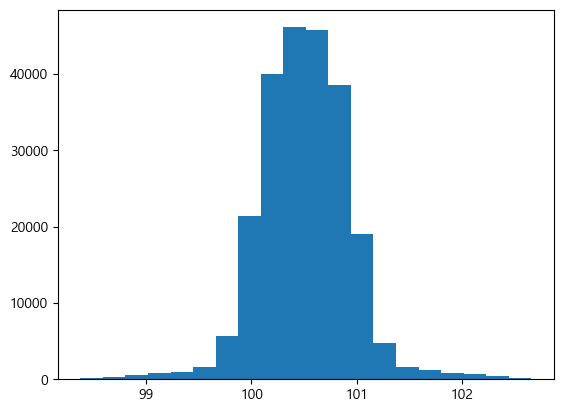

In [53]:
plt.hist(df['Z1_Temp'], bins = 20)

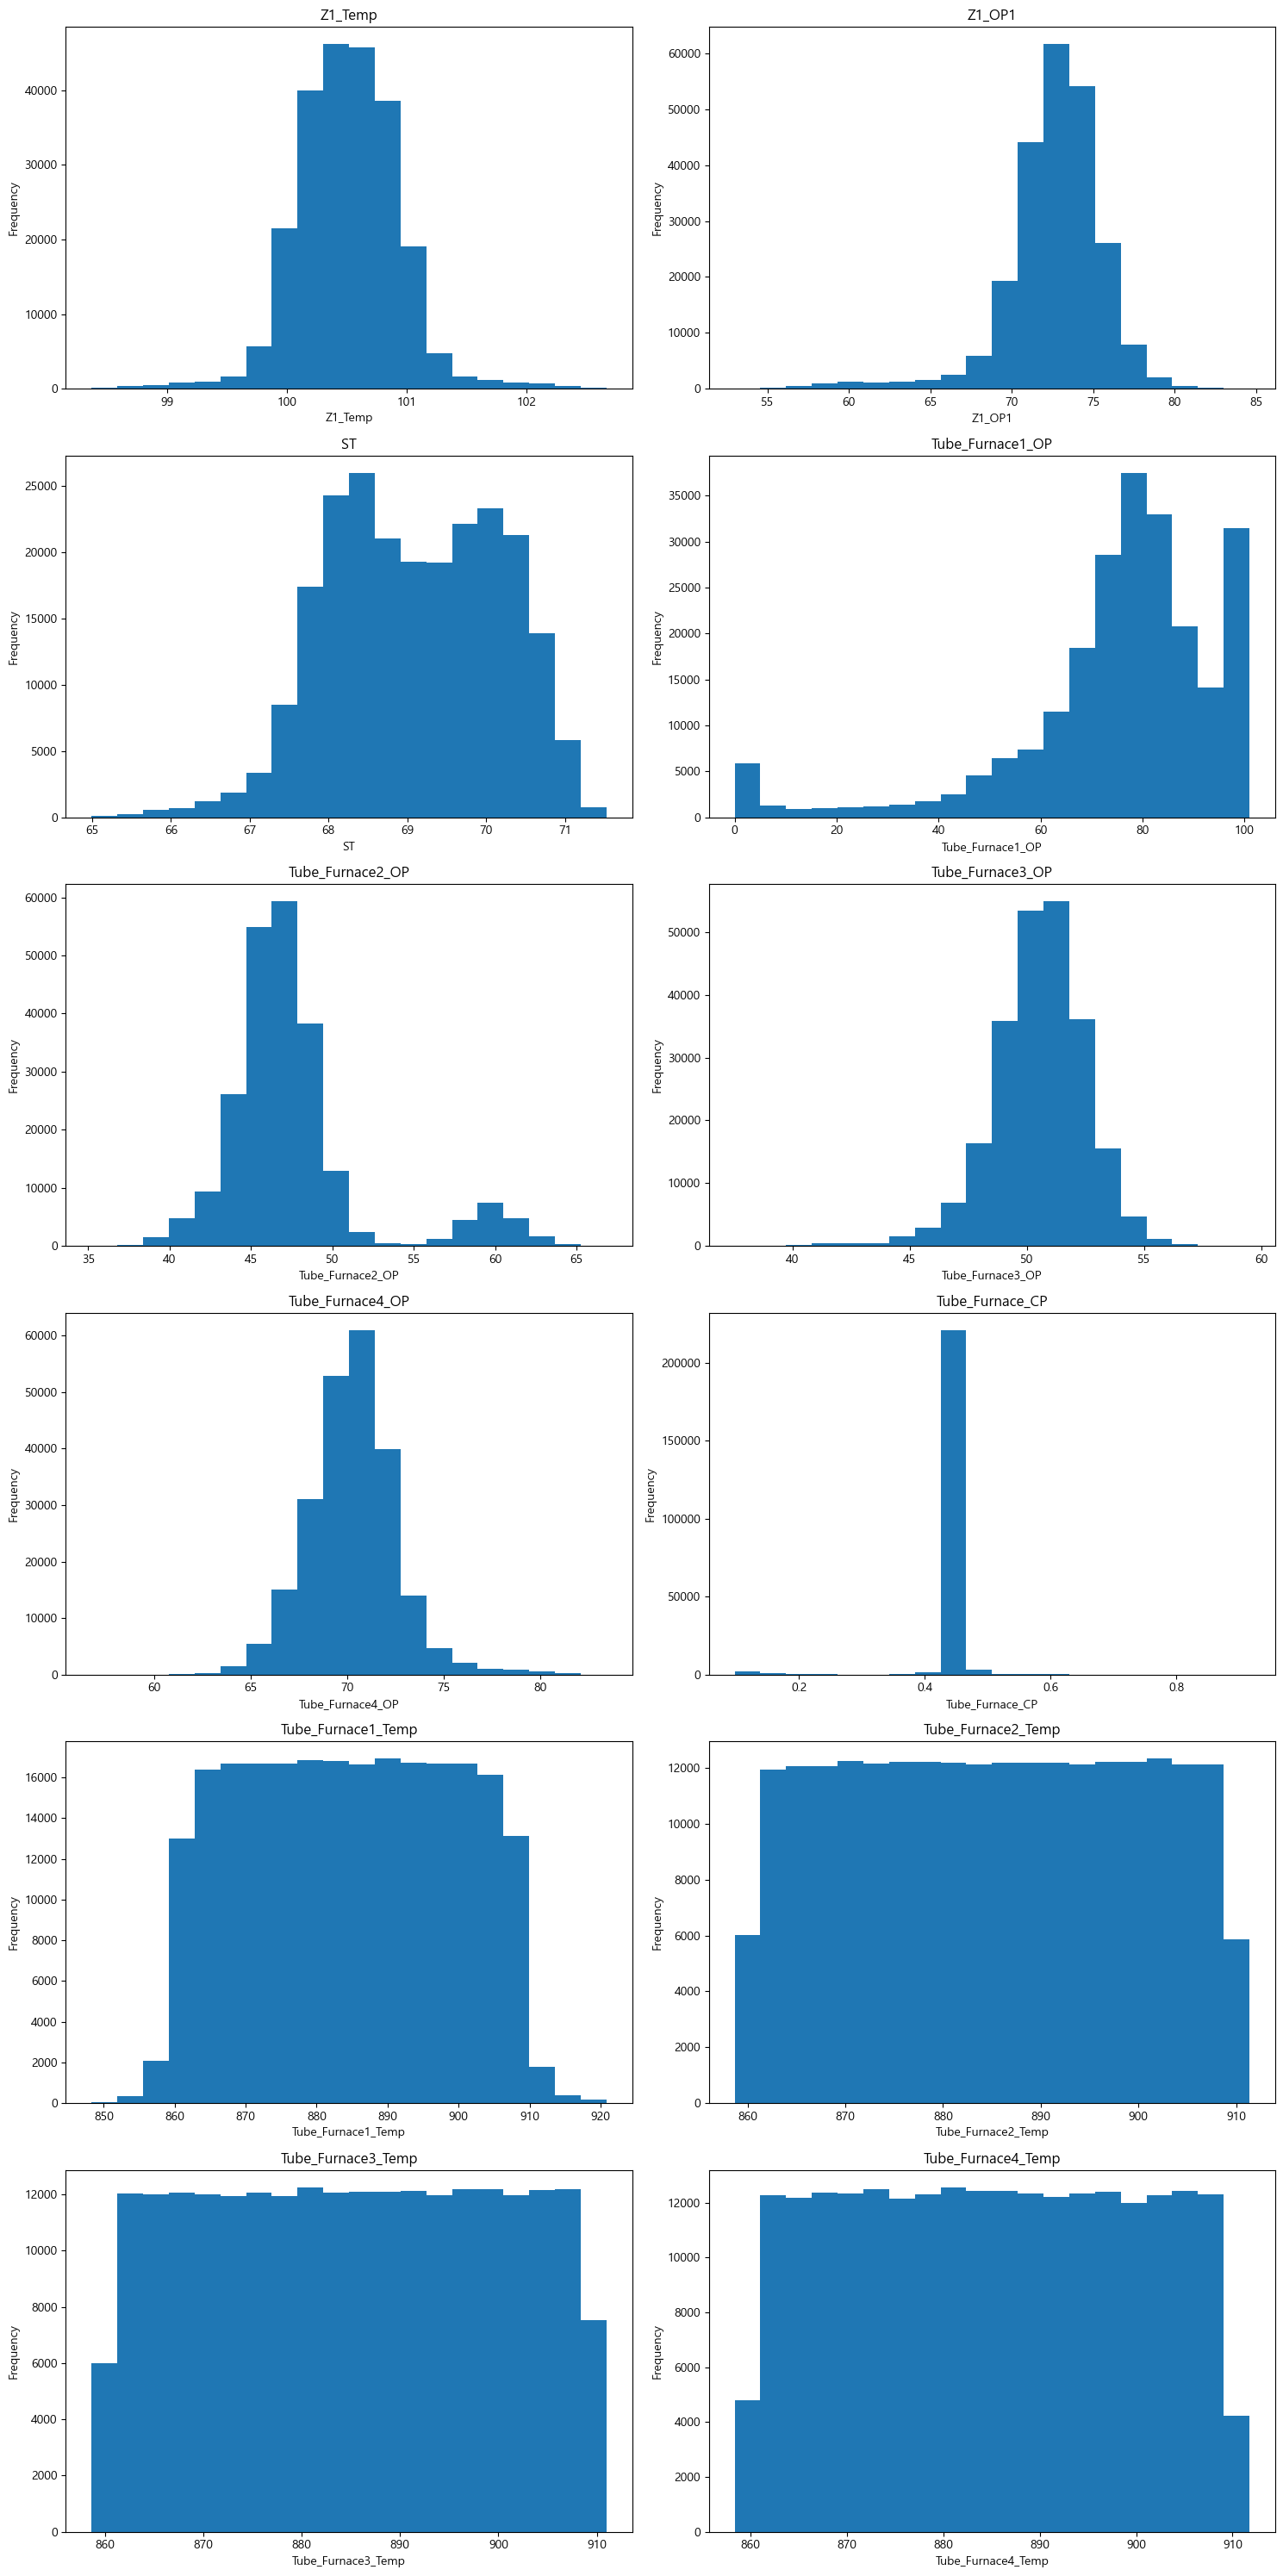

In [61]:
import matplotlib.pyplot as plt

# 변수 리스트
variables = [
    'Z1_Temp', 'Z1_OP1', 'ST',
    'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
    'Tube_Furnace4_OP', 'Tube_Furnace_CP', 'Tube_Furnace1_Temp',
    'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp'
]

# 서브플롯 수 계산
n_vars = len(variables)
n_rows = (n_vars + 1) // 2  # 2개씩 배치, 나머지 하나는 마지막 줄에

fig, axs = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axs = axs.flatten()  # 2D 배열을 1D 배열로 변환

for i, var in enumerate(variables):
    axs[i].hist(df[var], bins=20)
    axs[i].set_title(var)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# 남은 서브플롯 비우기
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [66]:
df['Tube_Furnace_CP'].value_counts()
df['Tube_Furnace3_OP'].value_counts()

Tube_Furnace3_OP
54.183424    2
50.819105    2
50.641509    2
50.513563    2
51.307446    2
            ..
49.421079    1
49.339839    1
49.602326    1
49.528153    1
53.684645    1
Name: count, Length: 230814, dtype: int64

In [68]:


# 카테고리화할 컬럼 리스트
columns_to_categorize = [
    'Z1_Temp', 'Z1_OP1', 'ST',
    'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace4_OP',
    'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace4_Temp'
]



# 각 컬럼에 대해 평균을 기준으로 카테고리화
for col in columns_to_categorize:
    # 평균 계산
    mean_value = df[col].mean()
    
    # 카테고리 컬럼 생성
    category_col_name = f'{col}_category'
    df[category_col_name] = df[col].apply(lambda x: 1 if x >= mean_value else 0)

